# Machine learning, a tutorial, part I

## 1-0 Sunmary
In this tutorial, a dataset about Melbourne Housing is being used.
The goal is building good machine learning models to PREDITCT HOUSE PRICE.


## 1-1: What is machine learning?

## 1-2: Data type and a quick trip

In [1]:
## import packages
import pandas as pd

## some setting for better reading experience
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)

##  
randomState = 8

In [2]:
## read data 
melb = pd.read_csv("data/melb_training_data.csv").sample(frac=1, random_state=randomState).reset_index(drop=True)
melb.drop(columns = ["Unnamed: 0"], inplace=True)

melb_test = melb[9000:]
melb = melb[:9000]

## a quick peek
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Kew,27 Earl St,3,h,1410000.0000,PI,Fletchers,24/09/2016,5.6000,3101.0000,3.0000,1.0000,1.0000,519.0000,NaN,NaN,Boroondara,-37.7960,145.0377,Southern Metropolitan,10331.0000
1,Hoppers Crossing,2 Dunk Ct,3,h,418000.0000,S,Ray,27/05/2017,18.4000,3029.0000,3.0000,2.0000,1.0000,435.0000,NaN,NaN,Wyndham,-37.8677,144.6841,Western Metropolitan,13830.0000
2,Sunshine,17 Leonard St,3,h,850000.0000,S,Douglas,18/06/2016,12.6000,3020.0000,3.0000,1.0000,2.0000,505.0000,NaN,1970.0000,Brimbank,-37.7798,144.8352,Western Metropolitan,3755.0000
3,Albert Park,102 Graham St,3,h,2155000.0000,S,RT,8/04/2017,3.3000,3206.0000,3.0000,2.0000,0.0000,130.0000,NaN,NaN,Port Phillip,-37.8453,144.9490,Southern Metropolitan,3280.0000
4,Murrumbeena,49 Dalny Rd,3,h,1100000.0000,VB,hockingstuart,27/06/2016,12.1000,3163.0000,3.0000,2.0000,2.0000,506.0000,169.0000,1950.0000,Glen Eira,-37.9020,145.0705,Southern Metropolitan,4442.0000


### Notes on Specific Variables

* Rooms: Number of rooms

* Price: Price in dollars

* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

* SellerG: Real Estate Agent

* Date: Date sold

* Distance: Distance from CBD

* Regionname: General Region (West, North West, North, North east …etc)

* Propertycount: Number of properties that exist in the suburb.

* Bedroom2 : Scraped # of Bedrooms (from different source)

* Bathroom: Number of Bathrooms

* Car: Number of carspots

* Landsize: Land Size

* BuildingArea: Building Size

* CouncilArea: Governing council for the area



In [9]:
## data types in machine learning (or statistics)
## https://en.wikipedia.org/wiki/Statistical_data_type

## data types in python(pandas) 
## object ~ categorical
## float/int ~ numeric
melb.dtypes

##

Suburb                      object
Address                     object
Rooms                        int64
Type                        object
Price                      float64
Method                      object
SellerG                     object
Date                        object
Distance                   float64
Postcode                   float64
Bedroom2                   float64
Bathroom                   float64
Car                        float64
Landsize                   float64
BuildingArea               float64
YearBuilt                  float64
CouncilArea                 object
Lattitude                  float64
Longtitude                 float64
Regionname                  object
Propertycount              float64
Date_in_datetime    datetime64[ns]
Date_num                     int64
dtype: object

### Categorical variable: Date

In [4]:
## the operations can be applied on object/float are different
print("Date in first row:" ,melb.Date[0], "\nDate in second row",melb.Date[1])

## it's obvious to us that subtraction between two dates is reasonable
## try to calculate day_diff.....
print(melb.Date[0] - melb.Date[1])



Date in first row: 24/09/2016 
Date in second row 27/05/2017


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [5]:
## into datetime format
melb["Date_in_datetime"] = pd.to_datetime(melb.Date)

## the data types of two version of date are different
## the later is actually numeric 
melb[["Date", "Date_in_datetime"]].head().dtypes


Date                        object
Date_in_datetime    datetime64[ns]
dtype: object

In [6]:
## Date_in_datetime is well-formated (wrapped)
melb[["Date", "Date_in_datetime"]].head()

,Date,Date_in_datetime
0,24/09/2016,2016-09-24
1,27/05/2017,2017-05-27
2,18/06/2016,2016-06-18
3,8/04/2017,2017-08-04
4,27/06/2016,2016-06-27


In [7]:
## Since the datetime data type is numeric, do some operation
day_diff_1 = melb.Date_in_datetime[0] - melb.Date_in_datetime[1]

## the wrapped number
print("Day difference is:" , day_diff_1)

## the naked number
print("Day difference is:" , day_diff_1.days)

Day difference is: -245 days +00:00:00
Day difference is: -245


In [8]:
## into a more "pure" numeric format
melb["Date_num"] = pd.to_datetime(melb.Date).astype("int")

## It's UNIX time in nanoseconds!
## https://zh.wikipedia.org/wiki/UNIX时间
print(melb["Date_num"].head())

0    1474675200000000000
1    1495843200000000000
2    1466208000000000000
3    1501804800000000000
4    1466985600000000000
Name: Date_num, dtype: int64


In [10]:
## same calculation.....
day_diff_2 = melb.Date_num[0] - melb.Date_num[1]
print("Day difference is:" , day_diff_2 / (10**9 * 60 * 60 *24))

Day difference is: -245.0


In [11]:
## why is the difference of data dypes important?
## to describe a categorical column
melb.Date.describe()

count           9000
unique            58
top       27/05/2017
freq             303
Name: Date, dtype: object

In [12]:
## to describe a numeric column  
melb.Date_num.describe()

count                  9000.0000
mean    1484670518400000000.0000
std       15547177190370468.0000
min     1453939200000000000.0000
25%     1470787200000000000.0000
50%     1487980800000000000.0000
75%     1498262400000000000.0000
max     1512691200000000000.0000
Name: Date_num, dtype: float64

In [13]:
## Other than subtraction.....
print("Sort the original format(string): \n")
print(melb.Date.head().sort_values())

print("Sort the datetime formate: \n")
print(melb.Date_in_datetime.head().sort_values())

Sort the original format(string): 

2    18/06/2016
0    24/09/2016
1    27/05/2017
4    27/06/2016
3     8/04/2017
Name: Date, dtype: object
Sort the datetime formate: 

2   2016-06-18
4   2016-06-27
0   2016-09-24
1   2017-05-27
3   2017-08-04
Name: Date_in_datetime, dtype: datetime64[ns]


In [14]:
## The right "order" of a variable especially crucial when making a graph!


### Categorical variable: Region

In [15]:
## Date is natually can be understand as an numeric sequence
## But how about other categorical variables?
melb.Regionname.value_counts()

Southern Metropolitan         3143
Northern Metropolitan         2567
Western Metropolitan          1966
Eastern Metropolitan           946
South-Eastern Metropolitan     293
Eastern Victoria                33
Northern Victoria               30
Western Victoria                22
Name: Regionname, dtype: int64

In [16]:
melb.Regionname.head(10)

0    Southern Metropolitan
1     Western Metropolitan
2     Western Metropolitan
3    Southern Metropolitan
4    Southern Metropolitan
5    Southern Metropolitan
6     Western Metropolitan
7     Western Metropolitan
8    Northern Metropolitan
9     Western Metropolitan
Name: Regionname, dtype: object

In [17]:
## encode Regionname into numeric
pd.factorize(melb.Regionname)

(array([0, 1, 1, ..., 1, 0, 0]),
 Index(['Southern Metropolitan', 'Western Metropolitan',
        'Northern Metropolitan', 'South-Eastern Metropolitan',
        'Eastern Metropolitan', 'Western Victoria', 'Eastern Victoria',
        'Northern Victoria'],
       dtype='object'))

In [18]:
## create a factorized column
melb["Regionname_factor"] = pd.factorize(melb.Regionname)[0]
melb[["Regionname", "Regionname_factor"]].head(10)

##

,Regionname,Regionname_factor
0,Southern Metropolitan,0
1,Western Metropolitan,1
2,Western Metropolitan,1
3,Southern Metropolitan,0
4,Southern Metropolitan,0
5,Southern Metropolitan,0
6,Western Metropolitan,1
7,Western Metropolitan,1
8,Northern Metropolitan,2
9,Western Metropolitan,1


## Exploratory Data Analysis

It's hard to teach you something solid about EDA in less than 1 hour. In my opinion, EDA is more like art than science. The sense is CULTIVATED with reading good works and practise. What I can do here is to show you a really small part of code when I'm exploring this Melbourne dataset....

And of course, there will be a lot of reading material for you!

The main purpose of this tutorial is to PREDICT PRICE. Keep this in mind when doing EDA!

### Table & Descriptive Statistics

In [19]:
## describe method offers a simple statitical overview(for numeric columns, by default)
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Date_num,Regionname_factor
count,9000.0000,9000.0000,9000.0000,9000.0000,9000.0000,9000.0000,8958.0000,9000.0000,4719.0000,5446.0000,9000.0000,9000.0000,9000.0000,9000.0000,9000.0000
mean,2.9484,1078794.5841,10.1427,3105.0629,2.9229,1.5372,1.6105,587.5162,156.2305,1964.9282,-37.8092,144.9949,7450.9457,1484670518400000000.0000,1.3646
std,0.9590,641379.2721,5.8568,88.7083,0.9568,0.6919,0.9637,4802.2310,660.2289,36.3403,0.0792,0.1038,4375.6508,15547177190370468.0000,1.3523
min,1.0000,85000.0000,0.0000,3000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1830.0000,-38.1825,144.4857,249.0000,1453939200000000000.0000,0.0000
25%,2.0000,650000.0000,6.2000,3044.0000,2.0000,1.0000,1.0000,180.0000,94.0000,1940.0000,-37.8566,144.9287,4387.0000,1470787200000000000.0000,0.0000
50%,3.0000,905000.0000,9.2000,3084.0000,3.0000,1.0000,2.0000,446.0000,128.0000,1970.0000,-37.8027,145.0004,6567.0000,1487980800000000000.0000,1.0000
75%,4.0000,1340000.0000,13.0000,3148.0000,3.0000,2.0000,2.0000,651.0000,175.0000,2000.0000,-37.7565,145.0573,10331.0000,1498262400000000000.0000,2.0000
max,10.0000,9000000.0000,48.1000,3977.0000,10.0000,8.0000,10.0000,433014.0000,44515.0000,2018.0000,-37.4539,145.5264,21650.0000,1512691200000000000.0000,7.0000


In [20]:
## to have one for categorical colunmns
melb.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,9000,9000,9000,9000,9000,9000,8077,9000
unique,299,8907,3,5,237,58,32,8
top,Reservoir,5 Charles St,h,S,Nelson,27/05/2017,Boroondara,Southern Metropolitan
freq,244,3,6264,5995,1037,303,774,3143


In [21]:
## One variable 
## the Room variable is an integer and not so many distinct values (here, 1 to 10)
## 
## the mean-std thing may not be helpful.....
melb.Rooms.describe()

count   9000.0000
mean       2.9484
std        0.9590
min        1.0000
25%        2.0000
50%        3.0000
75%        4.0000
max       10.0000
Name: Rooms, dtype: float64

In [22]:
## Discrete distribution
melb.Rooms.value_counts().sort_index()

1      444
2     2397
3     3880
4     1817
5      402
6       48
7        6
8        5
10       1
Name: Rooms, dtype: int64

In [23]:
## Grouped statistics
## It's a two variables analysis now

## What does the the groupby operation mean?

## In general, more room, higher the mean price is  
## If I'm going to predict the price, should I put this variable into the model?
melb.groupby("Rooms").Price.describe()


,count,mean,std,min,25%,50%,75%,max
Rooms,,,,,,,,
1,444.0000,436783.6712,238623.4613,85000.0000,325000.0000,385750.0000,459250.0000,2450000.0000
2,2397.0000,766250.1640,353145.4426,190000.0000,526000.0000,680000.0000,905000.0000,4525000.0000
3,3880.0000,1083961.5606,510737.4341,283000.0000,730000.0000,950000.0000,1330000.0000,9000000.0000
4,1817.0000,1441791.5294,743808.5463,131000.0000,895500.0000,1280000.0000,1785000.0000,5700000.0000
5,402.0000,1856778.8557,964162.0667,355000.0000,1174000.0000,1700000.0000,2297500.0000,8000000.0000
6,48.0000,1835843.7500,1055387.3452,506000.0000,1195000.0000,1733000.0000,2150125.0000,6500000.0000
7,6.0000,1594166.6667,639276.2835,1005000.0000,1228750.0000,1325000.0000,1837500.0000,2705000.0000
8,5.0000,1600200.0000,955688.3383,770000.0000,881000.0000,1150000.0000,2250000.0000,2950000.0000
10,1.0000,900000.0000,NaN,900000.0000,900000.0000,900000.0000,900000.0000,900000.0000


In [24]:
## The fact that Room has only 10 distinct values allows us 
## to summarize other varibles as if it's a categorical variable.
## What if not? 

## the Landsize variable is an float (continuous)

melb.Landsize.describe()

count     9000.0000
mean       587.5162
std       4802.2310
min          0.0000
25%        180.0000
50%        446.0000
75%        651.0000
max     433014.0000
Name: Landsize, dtype: float64

In [25]:
## Distribution....... ummmmmmm
melb.Landsize.value_counts().sort_index()

0.0000         1258
2.0000            1
5.0000            1
10.0000           1
15.0000           1
               ... 
40468.0000        1
41400.0000        1
44500.0000        1
76000.0000        1
433014.0000       1
Name: Landsize, Length: 1306, dtype: int64

In [ ]:
## Grouped statistics.....
## please don't do this
melb.groupby("Landsize").Price.describe()

In [26]:
## When the tool of grouped statistics is not working.....
## We may need something more abstract

## Correlation matrix
melb.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Date_num,Regionname_factor
Rooms,1.0000,0.4946,0.2893,0.0425,0.9539,0.5884,0.3971,0.0218,0.1132,-0.0793,0.0220,0.0971,-0.0830,0.1054,0.1202
Price,0.4946,1.0000,-0.1623,0.1154,0.4788,0.4702,0.2240,0.0366,0.0767,-0.3355,-0.2157,0.2025,-0.0453,0.0124,-0.2102
Distance,0.2893,-0.1623,1.0000,0.4223,0.2924,0.1283,0.2680,0.0236,0.1114,0.2475,-0.1155,0.2311,-0.0539,0.2561,0.3941
Postcode,0.0425,0.1154,0.4223,1.0000,0.0486,0.1121,0.0487,0.0292,0.0629,0.0302,-0.4002,0.4401,0.0660,0.0942,-0.0132
Bedroom2,0.9539,0.4788,0.2924,0.0486,1.0000,0.5873,0.3962,0.0218,0.1122,-0.0683,0.0225,0.0979,-0.0837,0.1312,0.1256
Bathroom,0.5884,0.4702,0.1283,0.1121,0.5873,1.0000,0.3173,0.0402,0.0987,0.1485,-0.0644,0.1137,-0.0564,0.0492,-0.0076
Car,0.3971,0.2240,0.2680,0.0487,0.3962,0.3173,1.0000,0.0216,0.0970,0.1196,0.0023,0.0574,-0.0102,0.0920,0.0564
Landsize,0.0218,0.0366,0.0236,0.0292,0.0218,0.0402,0.0216,1.0000,0.6071,0.0324,0.0119,0.0080,-0.0075,0.0357,0.0309
BuildingArea,0.1132,0.0767,0.1114,0.0629,0.1122,0.0987,0.0970,0.6071,1.0000,0.0080,0.0577,-0.0355,-0.0319,0.0275,0.0642
YearBuilt,-0.0793,-0.3355,0.2475,0.0302,-0.0683,0.1485,0.1196,0.0324,0.0080,1.0000,0.0721,-0.0093,0.0089,0.1067,0.1084


In [27]:
## With this tool, we can have a quick overview about the relationships between variables
## Are those variables having small coefficients with Price should be excluded from model?
## What is correlation in statistics?
## What is correlation in real world?

## Is the coefficients with Regionname_factor making sense?

In [27]:
## With the result above, 
## I'm curious why there is a negative correlation relationship between Price and YearBuilt.
## Since it implies when YearBuilt goes up ("younger"), 
## Price will tend to be down ("Cheaper")

mean_price_by_year = melb.groupby("YearBuilt").Price.aggregate(["count", "mean"])

## After the aggregate operation, YearBuilt is no longer treated as varible, but index
## use reset_index to unset thing transformation
mean_price_by_year = mean_price_by_year.reset_index()

mean_price_by_year[mean_price_by_year.YearBuilt > 1950] 

,YearBuilt,count,mean
70,1951.0000,2,1200750.0000
71,1952.0000,3,1316666.6667
72,1953.0000,4,1250000.0000
73,1954.0000,2,1132500.0000
74,1955.0000,62,1138463.7097
...,...,...,...
133,2014.0000,71,937056.3380
134,2015.0000,44,1265534.0909
135,2016.0000,42,1510250.0000
136,2017.0000,13,1046730.8462


### Data Visualization

In [28]:
## The table of mean Price by YearBuilt is hard to read.....
## Try some visualization maybe?


<AxesSubplot:xlabel='YearBuilt'>

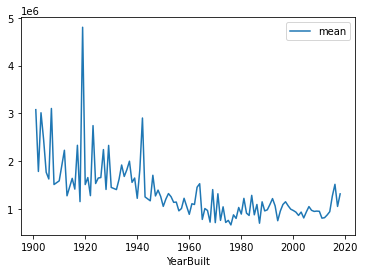

In [36]:
%matplotlib inline

## A line plot of mean price, by yearbuilt
## The correlation is right, the younger the cheaper.....


mean_price_by_year[mean_price_by_year.YearBuilt > 1900].plot(x="YearBuilt", y="mean") 

In [37]:
## Maybe the old building is bigger?
## a new column is coming....
melb["unit_price"] = melb.Price / melb.BuildingArea

melb[["Price", "unit_price", "YearBuilt"]].corr()



,Price,unit_price,YearBuilt
Price,1.0000,0.0680,-0.3355
unit_price,0.0680,1.0000,-0.0051
YearBuilt,-0.3355,-0.0051,1.0000


In [38]:
## After these few code blocks, what do we know now?
## 1. We should put YearBuilt and BuildingArea into the model together if we need one of them
## 2. Can I use unit_price in the prediction model?

In [39]:
## I can show you more about the visualization tools often used in my works....

<AxesSubplot:>

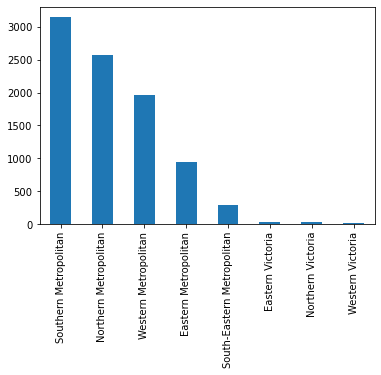

In [40]:
## Bar plot
melb.Regionname.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

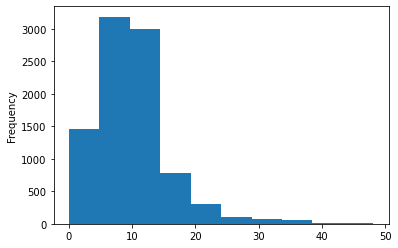

In [41]:
## histogram
## What is the difference betweeen bar plot and histogram?
melb.Distance.plot.hist()

<AxesSubplot:ylabel='Density'>

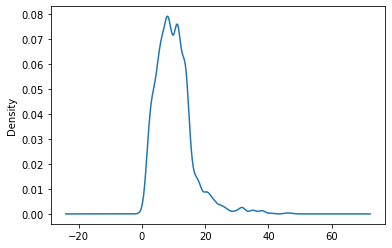

In [42]:
## density
## What is the difference betweeen density and histogram?
melb.Distance.plot.kde()

<AxesSubplot:>

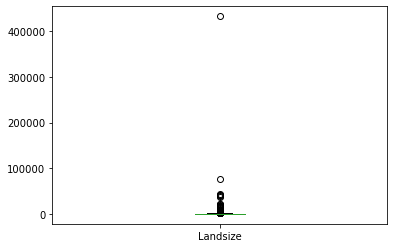

In [43]:
## Boxplot 
## The dot donates outliers.....
melb.Landsize.plot.box()

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

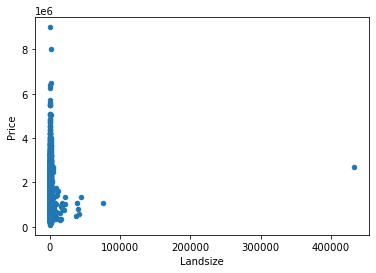

In [44]:
## scatter plot
## yeah these crazy outliers og Landsize make this plot valueless
melb.plot.scatter(x="Landsize", y="Price")


<AxesSubplot:xlabel='Landsize', ylabel='Price'>

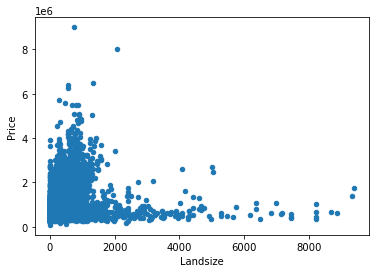

In [45]:
## scatter plot: 2
## exclude outliers 
## Is there insight to you?
melb[melb.Landsize < 10000].plot.scatter(x="Landsize", y="Price")

##

## Your first model: Linear Regression

### Round 1: Linear is all you need

In [46]:
## First, seperate the whole dataset into 2 parts
## the first 10000 rows as melb_train
## all the others as melb_test
## and you should forget about melb_test when training th model

melb_train = melb 
melb_test = melb_test

In [47]:
## Scikit-learn 
from sklearn.linear_model import LinearRegression

## Initiate a model with intercept (b_0)
lr_model = LinearRegression(fit_intercept=True)

<AxesSubplot:xlabel='Distance', ylabel='Price'>

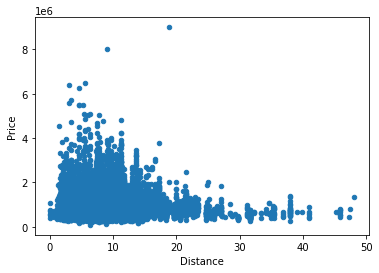

In [48]:
## First we try a model with only one feature: Distance
melb_train.plot.scatter(y="Price", x="Distance")

In [49]:
## select the features
features_in_model = ["Distance"]
X = melb_train[features_in_model]

## select the prediction target
y = melb_train["Price"]

## train the Linear regression model with y and X
lr_model.fit(X, y)

LinearRegression()

b_0 = 1259059.7488
b_1 = -17772.8388


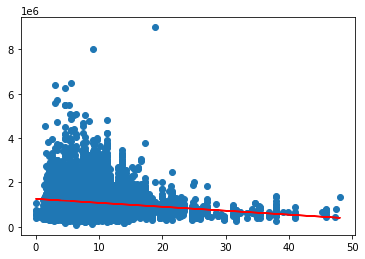

In [50]:
## The model we just fitted is:
## Price = b_0 + b_1 * Distance

print("b_0 = {:.4f}".format(lr_model.intercept_))
print("b_1 = {:.4f}".format(lr_model.coef_[0]))

## plot the result on the scatter plot
lr_pred_price = lr_model.intercept_ + melb_train.Distance*lr_model.coef_[0]

import matplotlib.pyplot as plt
plt.scatter(melb_train.Distance, melb_train.Price)
plt.plot(melb_train.Distance, lr_pred_price , color = "red")

In [51]:
## If the target is prefectly predicted by the feature
## all the data point (blue) will lay on the fitted line (red)
## obviously, this model is not perfect
## But how is it?
print("R^2 = {:.4f}".format(lr_model.score(X, y)))


R^2 = 0.0263


### Round 2: more features, more obstacles

In [52]:
## 0.02 is a poor result
## Distance itself can't have much information for predicting price
## we can try some another combination of features
features_in_model = ["Distance", "Rooms", "YearBuilt", "BuildingArea","Landsize"]

X = melb_train[features_in_model]

## However, there are missing data 
## NaN is "Not a Number"
X.head()

,Distance,Rooms,YearBuilt,BuildingArea,Landsize
0,5.6000,3,NaN,NaN,519.0000
1,18.4000,3,NaN,NaN,435.0000
2,12.6000,3,1970.0000,NaN,505.0000
3,3.3000,3,NaN,NaN,130.0000
4,12.1000,3,1950.0000,169.0000,506.0000


In [53]:
## When "YearBuilt" is not a number, the model can't multiply it with a coefficient
## We can just keep all the rows with no missing value
## the 2nd and 3rd row will be dropped
flawless_rows = melb_train[features_in_model].isna().sum(axis=1) == 0
flawless_rows.head()


0    False
1    False
2    False
3    False
4     True
dtype: bool

In [54]:
## Select the features, and keep those rows with no missing value
X = X.loc[flawless_rows, features_in_model]

## apply same missing value policy on target
y = melb_train.loc[flawless_rows, "Price"]

## Initiate a model
lr_model = LinearRegression(fit_intercept=True)

## train the Linear regression model
lr_model.fit(X, y)


LinearRegression()

In [55]:
## The model v2 is:
## Price = b_0 + b_1 * Distance + b_2 * Rooms + b_3 * YearBuilt +
##         b_4 * BuildingArea + b_5 * Landsize

print("b_0 = {:.4f}".format(lr_model.intercept_))
for i in range(len(lr_model.coef_)):
    print("b_{} = {:.4f}".format(i + 1,lr_model.coef_[i]))




b_0 = 8734960.9271
b_1 = -29977.0417
b_2 = 270200.6041
b_3 = -4327.0839
b_4 = 2297.0469
b_5 = 32.1486


In [56]:
## overall performance
## it's far better
print("R^2 = {:.4f}".format(lr_model.score(X, y)))

R^2 = 0.4753


### Evaluate with test data 

In [57]:
## apply same logic on testing data
## oops....... there are missing values in test data, too.....
X_test = melb_test[features_in_model]
y_test = melb_test["Price"]

X_test.head()


,Distance,Rooms,YearBuilt,BuildingArea,Landsize
9000,6.4000,2,1990.0000,89.0000,312.0000
9001,12.8000,4,1980.0000,268.0000,776.0000
9002,6.5000,3,NaN,NaN,447.0000
9003,13.0000,4,NaN,NaN,591.0000
9004,6.1000,2,NaN,NaN,1055.0000


In [58]:
y_test

9000     468000.0000
9001    1010000.0000
9002    1200000.0000
9003    1355000.0000
9004     640000.0000
            ...     
10995    950000.0000
10996   1307500.0000
10997    920000.0000
10998    800000.0000
10999    452000.0000
Name: Price, Length: 2000, dtype: float64

In [59]:
## what if just put test data like this into model?
## ummmmmmm......
lr_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [60]:
## in part 1 of the tutorial, we drop those rows with missing value
## just like what we did in the training phrase
## how to handle missing values is a topic for later
## but keep in mind: dropping data is bad! 壞份子! 抽煙bad!

flawless_rows_test = melb_test[features_in_model].isna().sum(axis=1) == 0
X_test = melb_test.loc[flawless_rows_test, features_in_model]
y_test = melb_test.loc[flawless_rows_test, "Price"]

## overall performance on test data
print("R^2 on test data = {:.4f}".format(lr_model.score(X_test, y_test)))



R^2 on test data = 0.5369


In [61]:
## But remeber, you ignore so many rows.....

print("""Originally, there are {} rows in test data. 
By dropping rows with any missing value, {} are left.""".format(melb_test.shape[0], X_test.shape[0]))

Originally, there are 2000 rows in test data. 
By dropping rows with any missing value, 1002 are left.


## Homework 1
1. EDA and data visualization on this data. Share with your pals. Is your story convincing? Is your story implying something helpful to the prediction models? 
2. Try some other models, but keep them LinearRegression(). Record your design and the following train/test R^2. There are some small tips:
    * different combination of variables
    * use categorical variables (in a good way....)
    * do some operations on numerics variables
    * deal with the missing values (since it gives you more data to use)
    
3. The main topic in this part is a regression problem. What if it's a binary classification problem now? (i.e there are only "1" and "0" in y)
    